In [19]:
import pandas as pd
from pandas import DataFrame
import numpy as np

#read in the games.csv and game_details.csv and remove null values
df_games = pd.read_csv('games.csv')
df_games = df_games.dropna()
df_game_details = pd.read_csv('games_details.csv')
df_game_details = df_game_details.dropna(subset=['TO', 'STL', 'FTA', 'BLK'])

# Merge based the two DataFrames based on home and visitor team of the game
merged_df_home = pd.merge(df_games, df_game_details, left_on=['GAME_ID', 'HOME_TEAM_ID'], right_on=['GAME_ID', 'TEAM_ID'], how='left')
merged_df_away = pd.merge(df_games, df_game_details, left_on=['GAME_ID', 'VISITOR_TEAM_ID'], right_on=['GAME_ID', 'TEAM_ID'], how='left')

# calculate the Turnovers, Steals, Freethrow Attempts, and Blocks for the home and visitor team
result_df_home = merged_df_home.groupby('GAME_ID').agg({
    'TO': 'sum',
    'STL': 'sum',
    'FTA': 'sum',
    'BLK': 'sum',
}).reset_index()

result_df_away = merged_df_away.groupby('GAME_ID').agg({
    'TO': 'sum',
    'STL': 'sum',
    'FTA': 'sum',
    'BLK': 'sum',
}).reset_index()

#rename the columns of the calculated statistics
result_df_home = result_df_home.rename(columns={'TO': 'HomeTeamTurnovers'})
result_df_away = result_df_away.rename(columns={'TO': 'AwayTeamTurnovers'})

result_df_home = result_df_home.rename(columns={'STL': 'HomeTeamSteals'})
result_df_away = result_df_away.rename(columns={'STL': 'AwayTeamSteals'})

result_df_home = result_df_home.rename(columns={'FTA': 'HomeTeamFreeThrowAttempts'})
result_df_away = result_df_away.rename(columns={'FTA': 'AwayTeamFreeThrowAttempts'})

result_df_home = result_df_home.rename(columns={'BLK': 'HomeTeamBlocks'})
result_df_away = result_df_away.rename(columns={'BLK': 'AwayTeamBlocks'})


# Merge the aggregated dataframes back to the games dataframe for home and away teams
df_games = pd.merge(df_games, result_df_home, on='GAME_ID', how='left')
df_games = pd.merge(df_games, result_df_away, on='GAME_ID', how='left')

# Fill null values with 0
df_games[['HomeTeamTurnovers', 'AwayTeamTurnovers']] = df_games[['HomeTeamTurnovers', 'AwayTeamTurnovers']].fillna(0)
df_games[['HomeTeamSteals', 'AwayTeamSteals']] = df_games[['HomeTeamSteals', 'AwayTeamSteals']].fillna(0)
df_games[['HomeTeamFreeThrowAttempts', 'AwayTeamFreeThrowAttempts']] = df_games[['HomeTeamFreeThrowAttempts', 'AwayTeamFreeThrowAttempts']].fillna(0)
df_games[['HomeTeamBlocks', 'AwayTeamBlocks']] = df_games[['HomeTeamBlocks', 'AwayTeamBlocks']].fillna(0)

#Calculate the difference of key statistics between the home and away team for further analysis of how these statistics affect the outcome of the game
df_games["Points_dif"] = df_games['PTS_home'] - df_games['PTS_away']
df_games["Assists_dif"] = df_games['AST_home'] - df_games['AST_away']
df_games["Rebounds_dif"] = df_games['REB_home'] - df_games['REB_away']
df_games["FGPCT_dif"] = df_games['FG_PCT_home'] - df_games['FG_PCT_away']
df_games["3PCT_dif"] = df_games['FG3_PCT_home'] - df_games['FG3_PCT_away']
df_games["Turnovers_dif"] = df_games['HomeTeamTurnovers'] - df_games['AwayTeamTurnovers']
df_games["Steals_dif"] = df_games['HomeTeamSteals'] - df_games['AwayTeamSteals']
df_games["FTA_dif"] = df_games['HomeTeamFreeThrowAttempts'] - df_games['AwayTeamFreeThrowAttempts']
df_games["Blocks_dif"] = df_games['HomeTeamBlocks'] - df_games['AwayTeamBlocks']


df_games['HomeTeamTurnovers']

/var/folders/mm/p9j4d6_x5b93fg7gz7zjjdkm0000gn/T/ipykernel_46461/2145473034.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_game_details = pd.read_csv('games_details.csv')


0        17.0
1        11.0
2        10.0
3        12.0
4        15.0
         ... 
26547    23.0
26548    19.0
26549    16.0
26550    14.0
26551    15.0
Name: HomeTeamTurnovers, Length: 26552, dtype: float64

In [20]:

#Average Stastistics for the Portland Traiblazers based off of the input DataFrame
def average_stats(df: DataFrame) -> list:
    count = 0
    Avg_Points = 0
    Avg_FG_PCT = 0
    Avg_FT_PCT = 0
    Avg_FG3_PCT = 0
    Avg_AST = 0
    Avg_REB = 0
    Avg_TO = 0
    Avg_STL = 0
    Avg_FTA = 0
    Avg_BLK = 0
    #calculate the averages for each statistics
    for index, row in df.iterrows():
        count = count + 1
        if row['HOME_TEAM_ID'] == 1610612757:
            Avg_Points = Avg_Points + row['PTS_home']
            Avg_FG_PCT = Avg_FG_PCT + row['FG_PCT_home']
            Avg_FT_PCT = Avg_FT_PCT + row['FT_PCT_home']
            Avg_FG3_PCT = Avg_FG3_PCT + row['FG3_PCT_home']
            Avg_AST = Avg_AST + row['AST_home']
            Avg_REB = Avg_REB + row['REB_home']
            Avg_TO = Avg_TO + row['HomeTeamTurnovers']
            Avg_STL = Avg_STL + row['HomeTeamSteals']
            Avg_FTA = Avg_FTA + row['HomeTeamFreeThrowAttempts']
            Avg_BLK = Avg_BLK + row['HomeTeamBlocks']
        else:
            Avg_Points = Avg_Points + row['PTS_away']
            Avg_FG_PCT = Avg_FG_PCT + row['FG_PCT_away']
            Avg_FT_PCT = Avg_FT_PCT + row['FT_PCT_away']
            Avg_FG3_PCT = Avg_FG3_PCT + row['FG3_PCT_away']
            Avg_AST = Avg_AST + row['AST_away']
            Avg_REB = Avg_REB + row['REB_away']
            Avg_TO = Avg_TO + row['AwayTeamTurnovers']
            Avg_STL = Avg_STL + row['AwayTeamSteals']
            Avg_FTA = Avg_FTA + row['AwayTeamFreeThrowAttempts']
            Avg_BLK = Avg_BLK + row['AwayTeamBlocks']

    Avg_Points = Avg_Points / count
    Avg_FG_PCT = Avg_FG_PCT / count
    Avg_FT_PCT = Avg_FT_PCT / count
    Avg_FG3_PCT = Avg_FG3_PCT / count
    Avg_AST = Avg_AST / count
    Avg_REB = Avg_REB / count
    Avg_TO = Avg_TO / count
    Avg_STL = Avg_STL / count
    Avg_FTA = Avg_FTA /count
    Avg_BLK = Avg_BLK /count
    print(f'Points: {Avg_Points}\nFieldgoal Percentage: {Avg_FG_PCT}\nFreeThrow Percentage: {Avg_FT_PCT}\n3-Point Percentage: {Avg_FG3_PCT}\nAssists: {Avg_AST}\nRebounds: {Avg_REB}\nTurnovers: {Avg_TO}\nSteals: {Avg_STL}\nFreeThrowAttempts: {Avg_FTA}\nBlocks: {Avg_BLK}\n')

    average_stats = [Avg_Points, Avg_FG_PCT, Avg_FT_PCT, Avg_FG3_PCT, Avg_AST, Avg_REB, Avg_TO, Avg_STL, Avg_FTA, Avg_BLK]
    return average_stats

#Create dataframes representing the Portland Trailblazers games: All of the games, All of the games they won, All of the games they lost, All of the home games, All of the away games
df_TB = df_games.copy()
df_TB_All = df_TB[(df_TB['HOME_TEAM_ID'] == 1610612757) | (df_TB['VISITOR_TEAM_ID'] == 1610612757)]
df_TB_All_Win = df_TB_All[((df_TB_All['HOME_TEAM_ID']== 1610612757) & (df_TB_All['HOME_TEAM_WINS'] == 1)) | ((df_TB_All['VISITOR_TEAM_ID'] == 1610612757) & (df_TB_All['HOME_TEAM_WINS'] == 0))]
df_TB_All_Lose = df_TB_All[((df_TB_All['HOME_TEAM_ID']== 1610612757) & (df_TB_All['HOME_TEAM_WINS'] == 0)) | ((df_TB_All['VISITOR_TEAM_ID'] == 1610612757) & (df_TB_All['HOME_TEAM_WINS'] == 1))]
df_TB_Home = df_TB[df_TB['HOME_TEAM_ID'] == 1610612757]
df_TB_Away = df_TB[df_TB['VISITOR_TEAM_ID'] == 1610612757]

#Print the average stats for each of the Dataframes that are given
print('Average stats for the Blazers')
average_stats(df_TB_All)
print('Average stats when the Blazers win')
average_stats(df_TB_All_Win)
print('Average stats when the Blazers lose')
average_stats(df_TB_All_Lose)
print('Average stats when the Blazers are home')
average_stats(df_TB_Home)
print('Average stats when the Blazers are away')
average_stats(df_TB_Away)


Average stats for the Blazers
Points: 101.60057142857143
Fieldgoal Percentage: 0.4522291428571431
FreeThrow Percentage: 0.774950285714286
3-Point Percentage: 0.35936628571428497
Assists: 20.928571428571427
Rebounds: 42.72571428571428
Turnovers: 13.50457142857143
Steals: 6.8748571428571426
FreeThrowAttempts: 22.972571428571428
Blocks: 4.908

Average stats when the Blazers win
Points: 107.3849710982659
Fieldgoal Percentage: 0.4745965317919075
FreeThrow Percentage: 0.7929028901734098
3-Point Percentage: 0.39143583815028854
Assists: 22.257803468208092
Rebounds: 44.673988439306356
Turnovers: 12.773410404624277
Steals: 7.068208092485549
FreeThrowAttempts: 23.78843930635838
Blocks: 5.202312138728324

Average stats when the Blazers lose
Points: 95.94689265536724
Fieldgoal Percentage: 0.43036723163841767
FreeThrow Percentage: 0.7574033898305074
3-Point Percentage: 0.32802146892655343
Assists: 19.629378531073446
Rebounds: 40.82146892655367
Turnovers: 14.219209039548023
Steals: 6.68587570621469
F

[99.37485843714609,
 0.44515402038505053,
 0.7722921857304639,
 0.3538663646659113,
 20.048697621744054,
 42.14269535673839,
 13.764439411098527,
 6.737259343148358,
 22.37485843714609,
 4.9071347678369195]

In [5]:
#import necessary libraries for visualization and logistic regression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

Points_dif
Pearson Correlation Coefficient: 0.8008254887130803
P-value: 0.0
Assists_dif
Pearson Correlation Coefficient: 0.45669541252250234
P-value: 0.0
Rebounds_dif
Pearson Correlation Coefficient: 0.366548713452474
P-value: 0.0
FGPCT_dif
Pearson Correlation Coefficient: 0.6275896491275093
P-value: 0.0
3PCT_dif
Pearson Correlation Coefficient: 0.41919625920756826
P-value: 0.0


/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

AttributeError: module 'seaborn' has no attribute 'catplox'

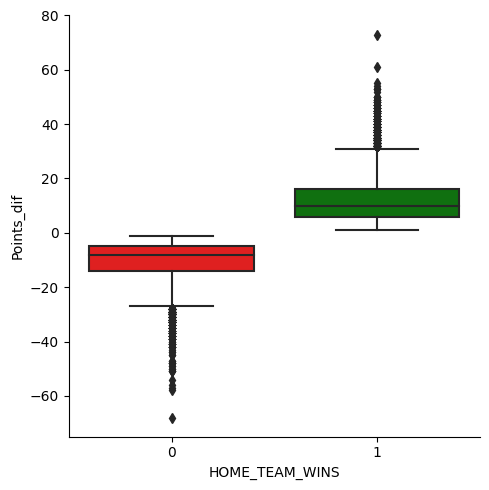

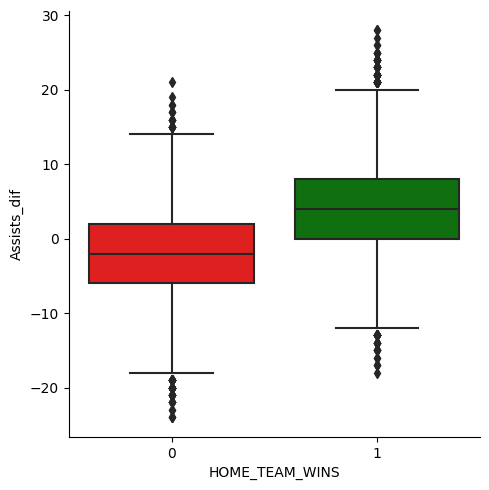

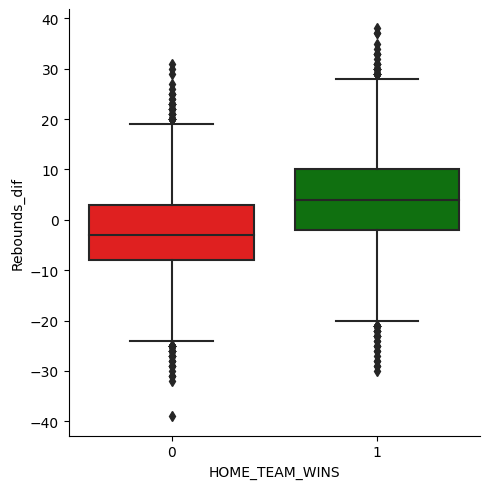

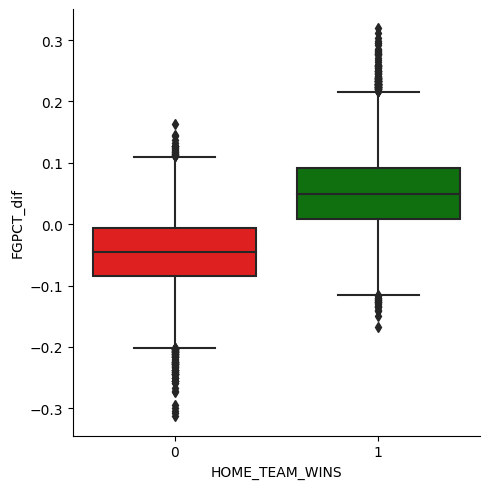

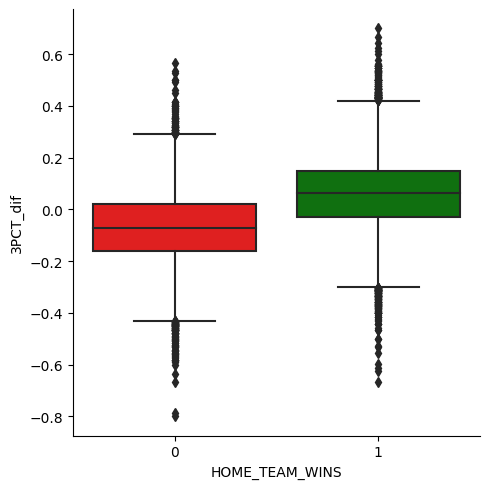

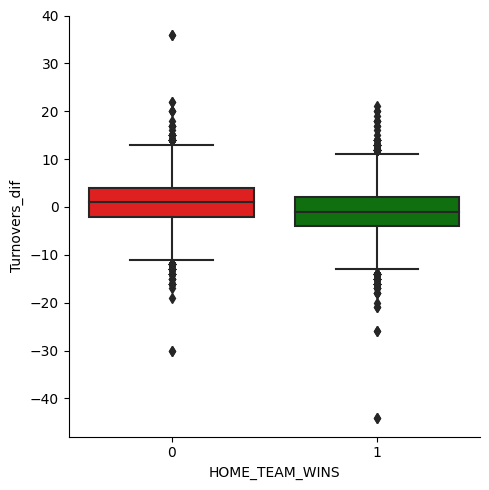

In [6]:
#Choose features of the dataset that could be important in determining the outcome of the game
features = ["Points_dif", "Assists_dif", "Rebounds_dif", "FGPCT_dif", "3PCT_dif"]
#Find the correlation coefficient and p-values of these features in regards to our target variable 'HOME_TEAM_WINS'
for item in features:
    correlation_coefficient, p_value = pearsonr(df_games[item].astype(float), df_games['HOME_TEAM_WINS'])
    print(item)
    print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
    print(f"P-value: {p_value}")

#Creat a box plot showing the impact the different features have on the target variable
sns.catplot(x = 'HOME_TEAM_WINS', y = 'Points_dif', data = df_games,  kind='box',  palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = 'Assists_dif', data = df_games,  kind='box',  palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = 'Rebounds_dif', data = df_games,  kind='box',  palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = 'FGPCT_dif', data = df_games,  kind='box',  palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = '3PCT_dif', data = df_games,  kind='box',  palette={0: 'red', 1: 'green'})
sns.catplot(x = 'HOME_TEAM_WINS', y = 'Turnovers_dif', data = df_games, kind='box', palette={0: 'red', 1: 'green'})
sns.catplox(x = 'HOME_TEAM_WINS', y = 'Steals_dif', data = df_games, kind='box', palette={0: 'red', 1: 'green'})
sns.catplox(x = 'HOME_TEAM_WINS', y = 'FTA_dif', data = df_games, kind='box', palette={0: 'red', 1: 'green'})
sns.catplox(x = 'HOME_TEAM_WINS', y = 'Blocks_dif', data = df_games, kind='box', palette={0: 'red', 1: 'green'})


In [14]:
#Create a logistic regression model based on the features we evaluated earlier
features = ["Assists_dif", "Rebounds_dif", "Turnovers_dif", "Steals_dif", "FTA_dif", "Blocks_dif"]

# Set features to X and target to Y
X = df_games[features]
y = df_games['HOME_TEAM_WINS']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
print(y_pred)




[0 1 0 ... 1 1 1]


Accuracy: 0.8294106571267181
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.78      2184
           1       0.84      0.88      0.86      3127

    accuracy                           0.83      5311
   macro avg       0.83      0.82      0.82      5311
weighted avg       0.83      0.83      0.83      5311



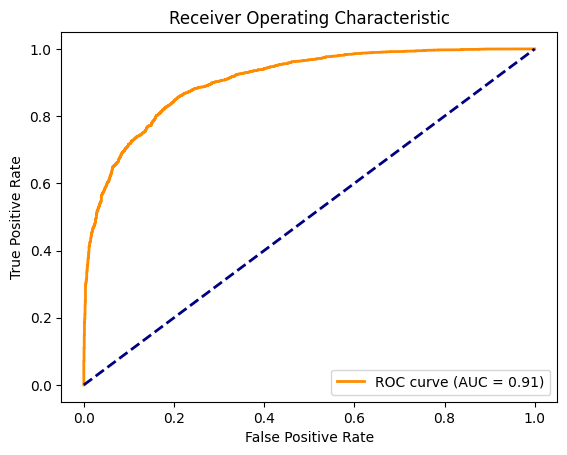

/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


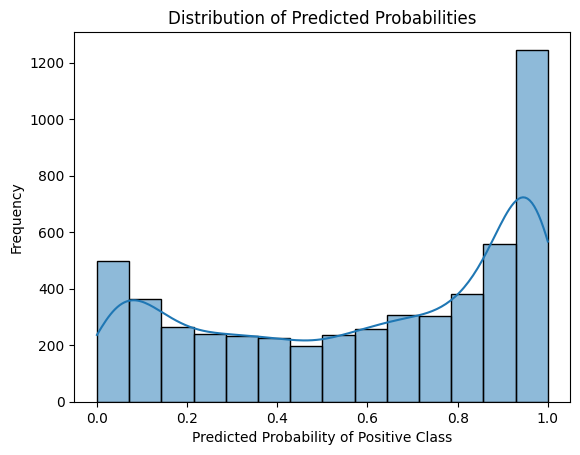

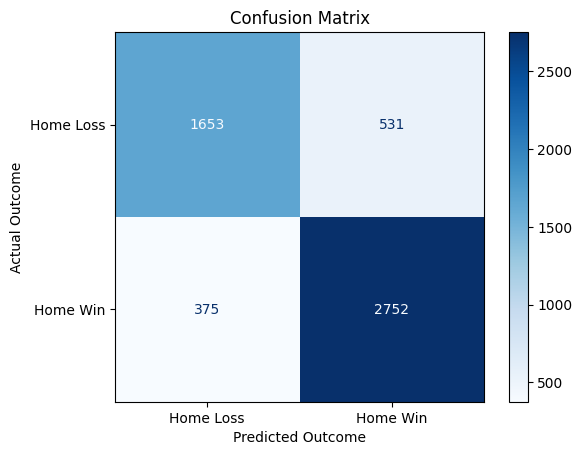

In [15]:
# Evaluate the model

#Calculate different accuracy and classification metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

#Visualize the ROC curve and AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#Calculate the probabilities of each outcome rather than classification
predicted_probabilities = logreg.predict_proba(X_test)
#Visualize the distribution of predicted probabilities
sns.histplot(predicted_probabilities[:, 1], kde=True)
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

#Create a confusion matrix showing how accurate our model was at correctly determining the outcome
categories = ['Home Loss', 'Home Win']
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=categories)
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.show()

Points: 101.60057142857143
Fieldgoal Percentage: 0.4522291428571431
FreeThrow Percentage: 0.774950285714286
3-Point Percentage: 0.35936628571428497
Assists: 20.928571428571427
Rebounds: 42.72571428571428
Turnovers: 13.50457142857143
Steals: 6.8748571428571426
FreeThrowAttempts: 22.972571428571428
Blocks: 4.908

Predictions for Portland Trail Blazers' games:
[1 0 1 ... 0 1 1]


/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


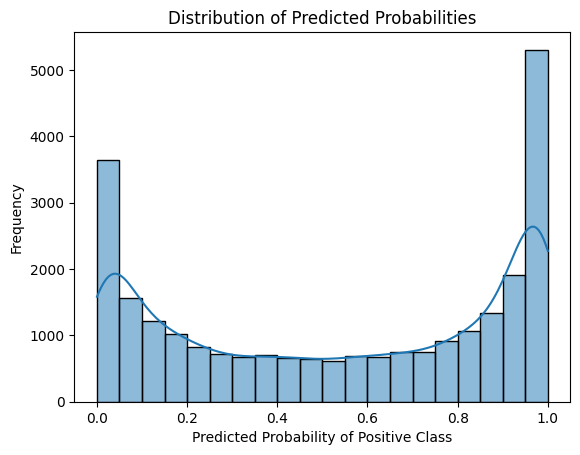

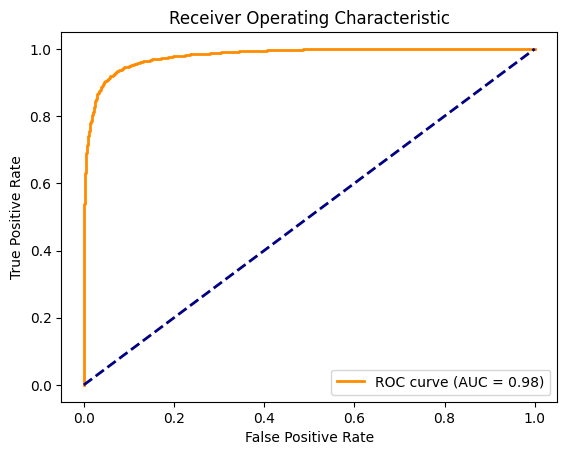

In [9]:
#Using our function to retreive average stats and using our logistic regression to predict how the Trailblazers would perform
df_TB_games = df_games.copy()
df_TB_games = df_TB_games[df_TB_games['VISITOR_TEAM_ID'] != 1610612757]

#Get the average stats for the Trailblazers
TB_stats = average_stats(df_TB_All)

#Re-calculate our features based on our average stats
df_TB_games["Assists_dif"] = TB_stats[4] - df_TB_games['AST_away']
df_TB_games["Rebounds_dif"] = TB_stats[5] - df_TB_games['REB_away']
df_TB_games["FGPCT_dif"] = TB_stats[1] - df_TB_games['FG_PCT_away']
df_TB_games["3PCT_dif"] = TB_stats[3] - df_TB_games['FG3_PCT_away']
df_TB_games["Turnovers_dif"] = TB_stats[6] - df_TB_games['AwayTeamTurnovers']
df_TB_games["Steals_dif"] = TB_stats[7] - df_TB_games['AwayTeamSteals']
df_TB_games["FTA_dif"] = TB_stats[8] - df_TB_games['AwayTeamFreeThrowAttempts']
df_TB_games["Blocks_dif"] = TB_stats[9] - df_TB_games['AwayTeamBlocks']

PT_features = ['Assists_dif', 'Rebounds_dif', 'FGPCT_dif', '3PCT_dif', 'Turnovers_dif', 'Steals_dif', 'FTA_dif', 'Blocks_dif']

# Extract the selected features for prediction from the Portland Trail Blazers' stats
portland_features = df_TB_games[PT_features]

# Make predictions using the logistic regression model
predictions = logreg.predict(portland_features)

# Display the predictions
print("Predictions for Portland Trail Blazers' games:")
print(predictions)

predicted_probabilities = logreg.predict_proba(portland_features)

sns.histplot(predicted_probabilities[:, 1], kde=True)
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

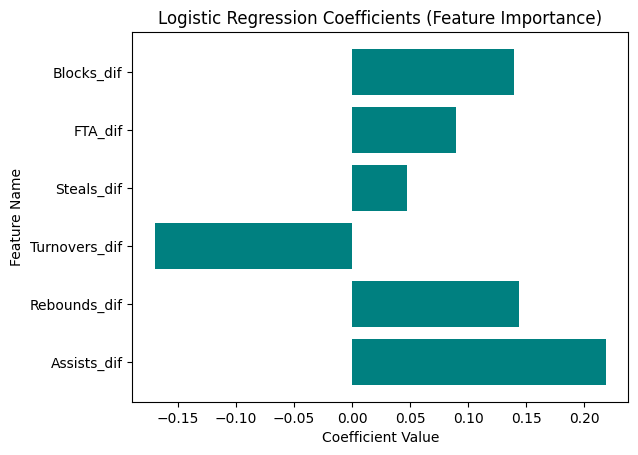

ValueError: Length of values (25669) does not match length of index (5311)

In [16]:

# Assuming 'predictions' is an array of predicted outcomes (0 or 1) for each game
# Replace 'predictions' with the actual variable containing predictions

'''plt.bar(range(len(predictions)), predictions, color='blue', alpha=0.7)
plt.xlabel('Game Index')
plt.ylabel('Predicted Outcome (1: Win, 0: Loss)')
plt.title('Predicted Outcomes for Trail Blazers vs. Visitor Teams')
plt.show()

corr_matrix = df_visualize.corr()
sns.heatmap(corr_matrix[['Predicted_Outcome']], annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Predicted Outcome')
plt.show()'''

# Assuming 'logreg' is your trained logistic regression model
coefficients = logreg.coef_[0]
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, coefficients, color='teal')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Logistic Regression Coefficients (Feature Importance)')
plt.show()

# Assuming 'X_test' is your test set and 'predictions' is the array of predicted outcomes
df_compare = X_test.copy()
df_compare['Predicted_Outcome'] = predictions

# List of features for comparative analysis
selected_features = ["Assists_dif", "Rebounds_dif", "FGPCT_dif", "3PCT_dif"]

# Create side-by-side plots for selected features
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Predicted_Outcome', y=feature, data=df_compare)
    plt.xlabel('Predicted Outcome (1: Win, 0: Loss)')
    plt.ylabel(feature)
    plt.title(f'Comparative Analysis of {feature} for Predicted Outcomes')
    plt.show()